<a href="https://colab.research.google.com/github/lorenzrossi/MachineLearning-CatsDogs-NN/blob/master/Model_cnn_six_block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from os import listdir
import pandas as pd
# Basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

# Image preprocessing
import pathlib
import PIL
import PIL.Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

tfk = tf.keras
tf.keras.backend.set_floatx("float64")
%load_ext tensorboard


from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/CatsDogs'

Mounted at /content/drive


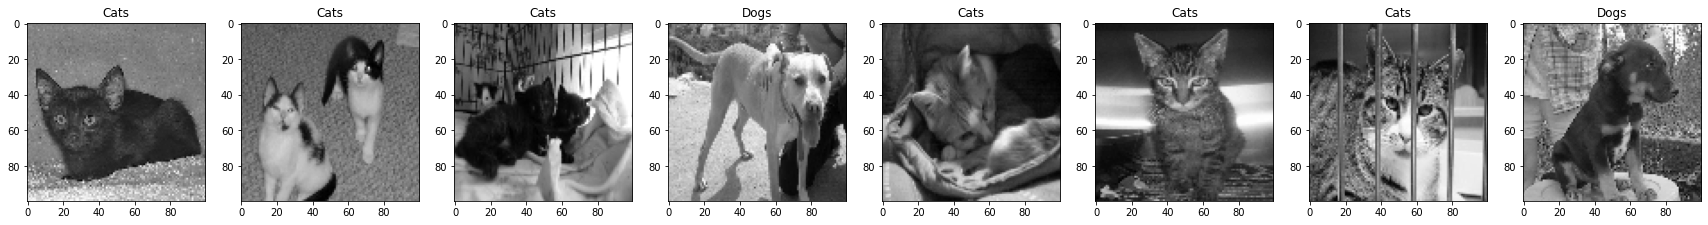

In [2]:
X = pickle.load(open('/content/drive/MyDrive/CatsDogs/Pickles/X.pickle','rb'))
y = pickle.load(open('/content/drive/MyDrive/CatsDogs/Pickles/y.pickle','rb'))

pets_classes = ['Cats','Dogs']

images_to_plot = 8

gray_channel = 0

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(30, 20)

for i in range(images_to_plot):
  gray_image = X[i][:, :, gray_channel]
  ax[i].imshow(gray_image, cmap = "gray")
  numeric_label = y[i]
  ax[i].set_title(pets_classes[numeric_label])

In [3]:
number_of_classes = len(pets_classes)

In [4]:
x_size, img_dim = X.shape[0], X.shape[1]

# rescale in [0,1]
X = tf.cast(X, tf.float32) / 255.0

In [5]:
depth = 1
y = tf.reshape(tf.one_hot(y, depth), shape = [x_size, depth])

In [6]:
# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
# Hyperparameters
epoch = 50 # n of epochs
batch = 64 # batch size

# Defining the loss
loss = keras.losses.BinaryCrossentropy()

# Defining the optimizer(s)
op_1 = Adam()
op_2 = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/50)
op_3 = RMSprop(learning_rate=1e-4)

In [ ]:
# Defining plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    # Loss plots
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    # Accuracy plots
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    plt.show()

# Models
Model 1 is the base architecture

Model 2 adds dropout layers

Model 3 adds batch normalization layers 

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      288       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18432     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36864     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

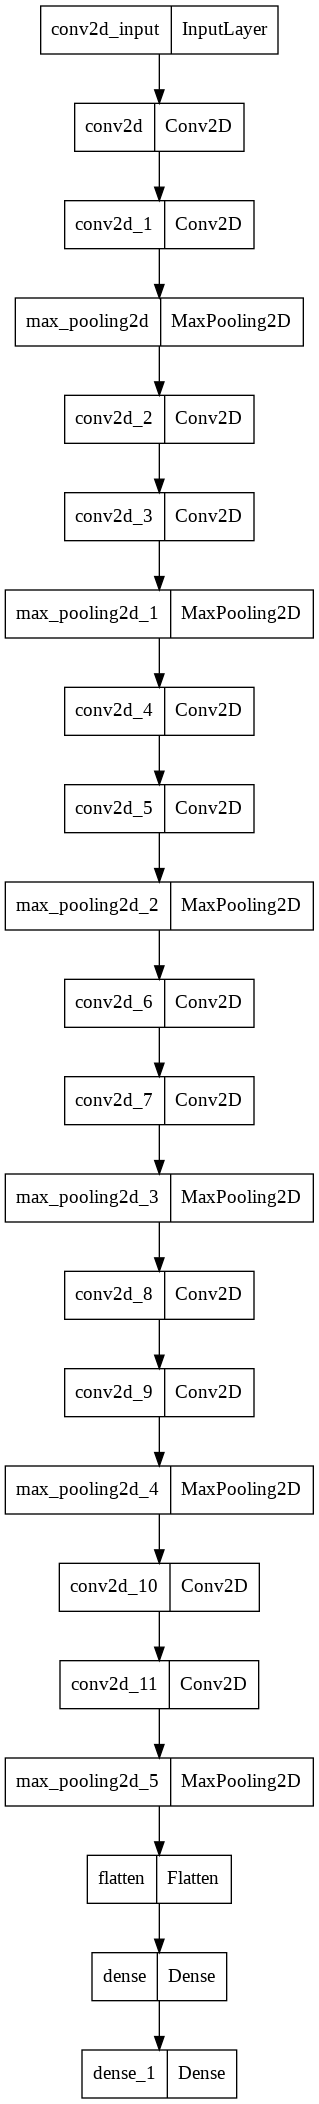

In [ ]:
keras.utils.plot_model(model1, 'model1.png')

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 conv2d_15 (Conv2D)          (None, 50, 50, 64)        36864     
                                                      

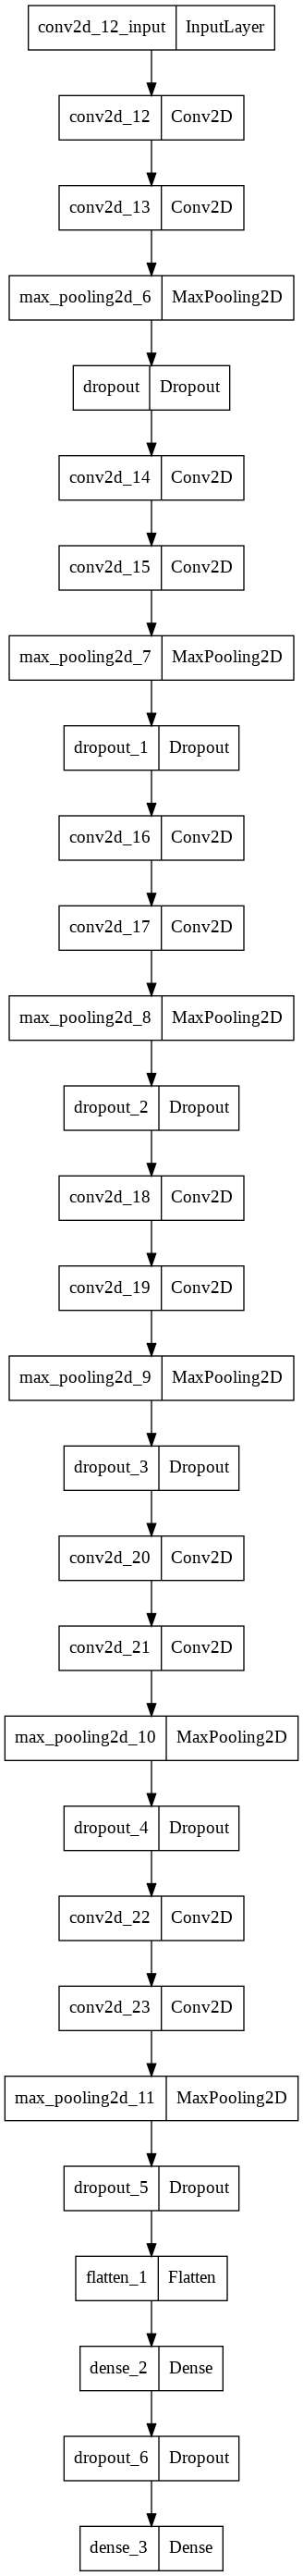

In [ ]:
keras.utils.plot_model(model2, 'model2.png')

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                      

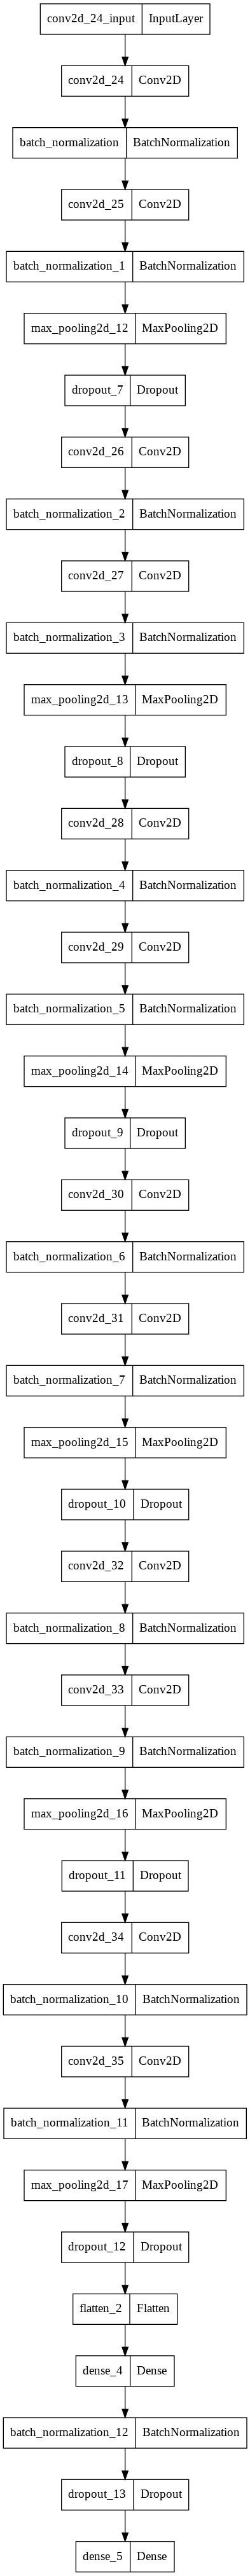

In [ ]:
keras.utils.plot_model(model3, 'model3.png')

Epoch 1/50
313/313 [==============================] - 21s 55ms/step - loss: 0.6940 - binary_accuracy: 0.5021 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 2/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6932 - binary_accuracy: 0.4996 - val_loss: 0.6932 - val_binary_accuracy: 0.4958
Epoch 3/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6932 - binary_accuracy: 0.5007 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 4/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6932 - binary_accuracy: 0.4957 - val_loss: 0.6932 - val_binary_accuracy: 0.4958
Epoch 5/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6934 - binary_accuracy: 0.4989 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 6/50
313/313 [==============================] - 17s 53ms/step - loss: 0.6932 - binary_accuracy: 0.4935 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 7/50
313/313 [==============================] 

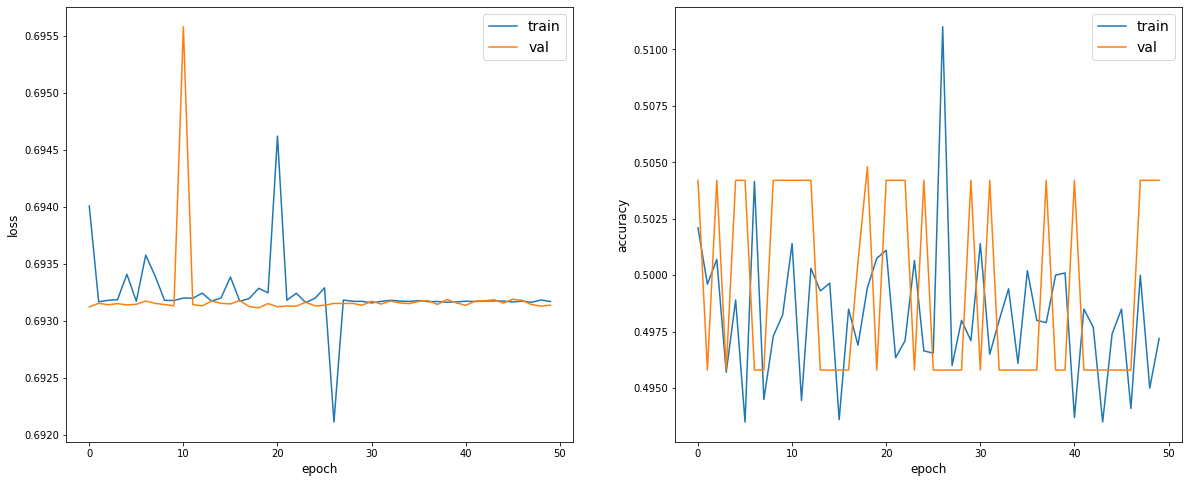

157/157 [==============================] - 2s 12ms/step - loss: 0.6931 - binary_accuracy: 0.5042
test loss, test acc: [0.693136669587781, 0.5042033626901521]


In [ ]:
# TRAINING MODEL 1

# compiling the model
model1.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model1.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result_1 = model1.evaluate(X_test, y_test)
print("test loss, test acc:", result_1)

Epoch 1/50
313/313 [==============================] - 18s 54ms/step - loss: 0.7126 - binary_accuracy: 0.4969 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 2/50
313/313 [==============================] - 17s 54ms/step - loss: 0.6932 - binary_accuracy: 0.5009 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 3/50
313/313 [==============================] - 17s 54ms/step - loss: 0.6935 - binary_accuracy: 0.5020 - val_loss: 0.6932 - val_binary_accuracy: 0.4958
Epoch 4/50
313/313 [==============================] - 17s 54ms/step - loss: 0.6962 - binary_accuracy: 0.4954 - val_loss: 0.6932 - val_binary_accuracy: 0.4958
Epoch 5/50
313/313 [==============================] - 17s 54ms/step - loss: 0.6932 - binary_accuracy: 0.4988 - val_loss: 0.6932 - val_binary_accuracy: 0.4958
Epoch 6/50
313/313 [==============================] - 17s 54ms/step - loss: 0.6932 - binary_accuracy: 0.4996 - val_loss: 0.6931 - val_binary_accuracy: 0.5042
Epoch 7/50
313/313 [==============================] 

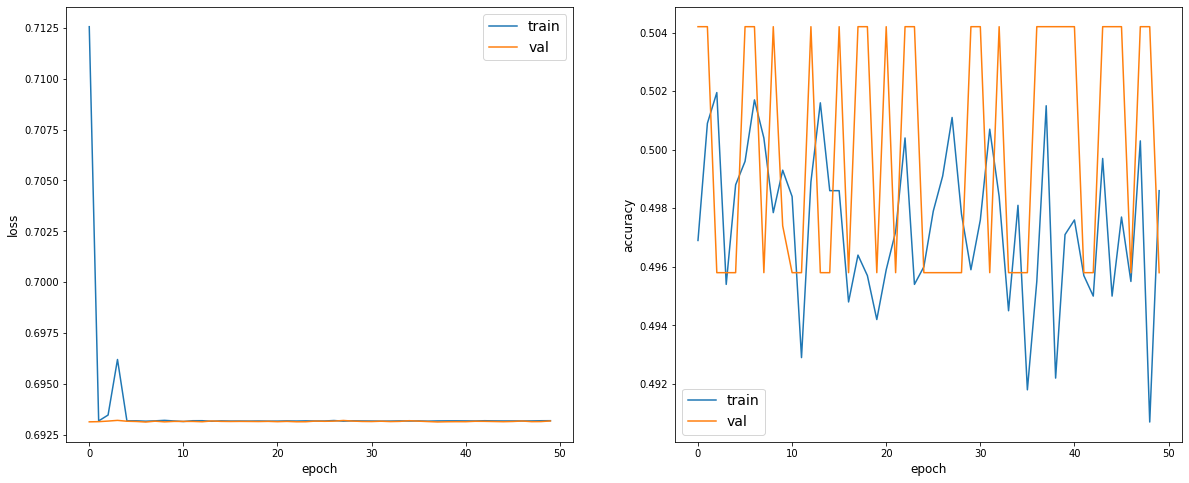

157/157 [==============================] - 2s 12ms/step - loss: 0.6932 - binary_accuracy: 0.4958
test loss, test acc: [0.6931716029933189, 0.49579663730984785]


In [ ]:
# TRAINING MODEL 2

# compiling the model
model2.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model2.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result_2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", result_2)

Epoch 1/50
313/313 [==============================] - 30s 84ms/step - loss: 0.7380 - binary_accuracy: 0.5703 - val_loss: 0.9119 - val_binary_accuracy: 0.4970
Epoch 2/50
313/313 [==============================] - 26s 83ms/step - loss: 0.6488 - binary_accuracy: 0.6273 - val_loss: 0.6559 - val_binary_accuracy: 0.6063
Epoch 3/50
313/313 [==============================] - 26s 83ms/step - loss: 0.5928 - binary_accuracy: 0.6820 - val_loss: 0.6226 - val_binary_accuracy: 0.6415
Epoch 4/50
313/313 [==============================] - 26s 83ms/step - loss: 0.5267 - binary_accuracy: 0.7379 - val_loss: 0.6274 - val_binary_accuracy: 0.6337
Epoch 5/50
313/313 [==============================] - 26s 83ms/step - loss: 0.4625 - binary_accuracy: 0.7805 - val_loss: 0.5085 - val_binary_accuracy: 0.7512
Epoch 6/50
313/313 [==============================] - 26s 83ms/step - loss: 0.4098 - binary_accuracy: 0.8149 - val_loss: 0.7351 - val_binary_accuracy: 0.6387
Epoch 7/50
313/313 [==============================] 

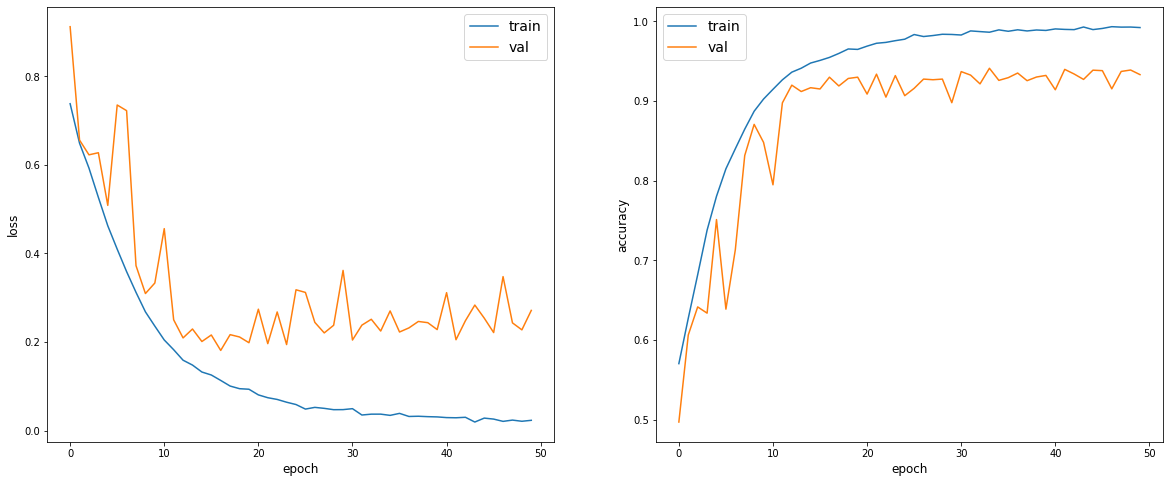

157/157 [==============================] - 2s 13ms/step - loss: 0.2715 - binary_accuracy: 0.9331
test loss, test acc: [0.27150232555735787, 0.9331465172137711]


In [ ]:
# TRAINING MODEL 3 with Adam

# compiling the model
model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result_op1 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_op1)

Epoch 1/50
625/625 [==============================] - 46s 50ms/step - loss: 0.7712 - binary_accuracy: 0.5639 - val_loss: 0.8608 - val_binary_accuracy: 0.5578
Epoch 2/50
625/625 [==============================] - 30s 49ms/step - loss: 0.5754 - binary_accuracy: 0.7031 - val_loss: 0.8238 - val_binary_accuracy: 0.5801
Epoch 3/50
625/625 [==============================] - 30s 49ms/step - loss: 0.4482 - binary_accuracy: 0.7950 - val_loss: 0.6697 - val_binary_accuracy: 0.6429
Epoch 4/50
625/625 [==============================] - 30s 49ms/step - loss: 0.3509 - binary_accuracy: 0.8437 - val_loss: 0.5762 - val_binary_accuracy: 0.7298
Epoch 5/50
625/625 [==============================] - 30s 49ms/step - loss: 0.2972 - binary_accuracy: 0.8736 - val_loss: 0.2811 - val_binary_accuracy: 0.8755
Epoch 6/50
625/625 [==============================] - 30s 49ms/step - loss: 0.2512 - binary_accuracy: 0.8979 - val_loss: 0.2262 - val_binary_accuracy: 0.9015
Epoch 7/50
625/625 [==============================] 

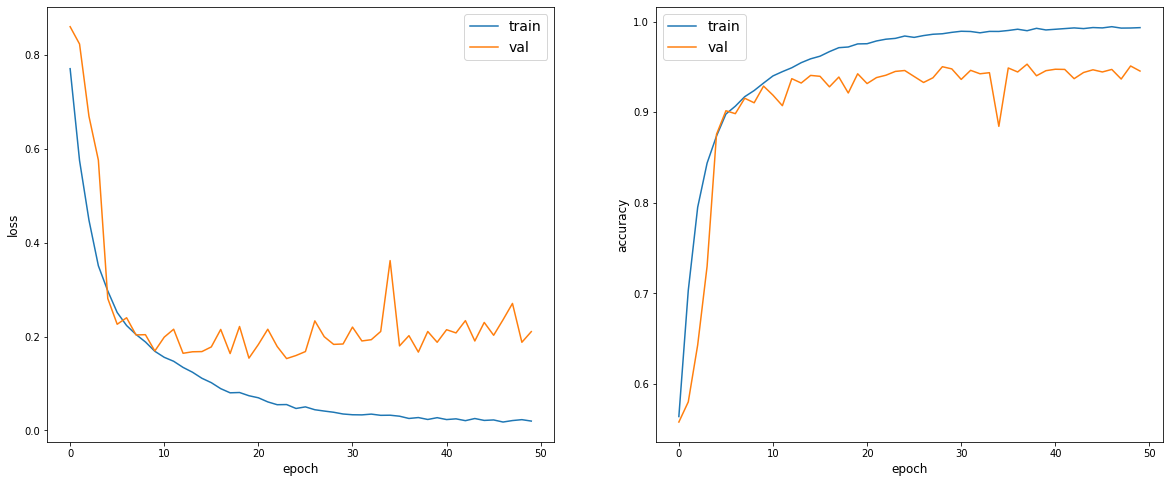

157/157 [==============================] - 2s 14ms/step - loss: 0.2104 - binary_accuracy: 0.9454
Test loss and acc for batch 32: [0.21042137034480657, 0.9453562850280224]
Epoch 1/50
157/157 [==============================] - 29s 155ms/step - loss: 0.7344 - binary_accuracy: 0.5878 - val_loss: 1.5999 - val_binary_accuracy: 0.5070
Epoch 2/50
157/157 [==============================] - 24s 153ms/step - loss: 0.6230 - binary_accuracy: 0.6554 - val_loss: 0.6982 - val_binary_accuracy: 0.5512
Epoch 3/50
157/157 [==============================] - 24s 152ms/step - loss: 0.5415 - binary_accuracy: 0.7286 - val_loss: 0.5937 - val_binary_accuracy: 0.6926
Epoch 4/50
157/157 [==============================] - 24s 152ms/step - loss: 0.4764 - binary_accuracy: 0.7710 - val_loss: 0.5005 - val_binary_accuracy: 0.7526
Epoch 5/50
157/157 [==============================] - 24s 153ms/step - loss: 0.4232 - binary_accuracy: 0.8011 - val_loss: 0.4822 - val_binary_accuracy: 0.7752
Epoch 6/50
157/157 [==============

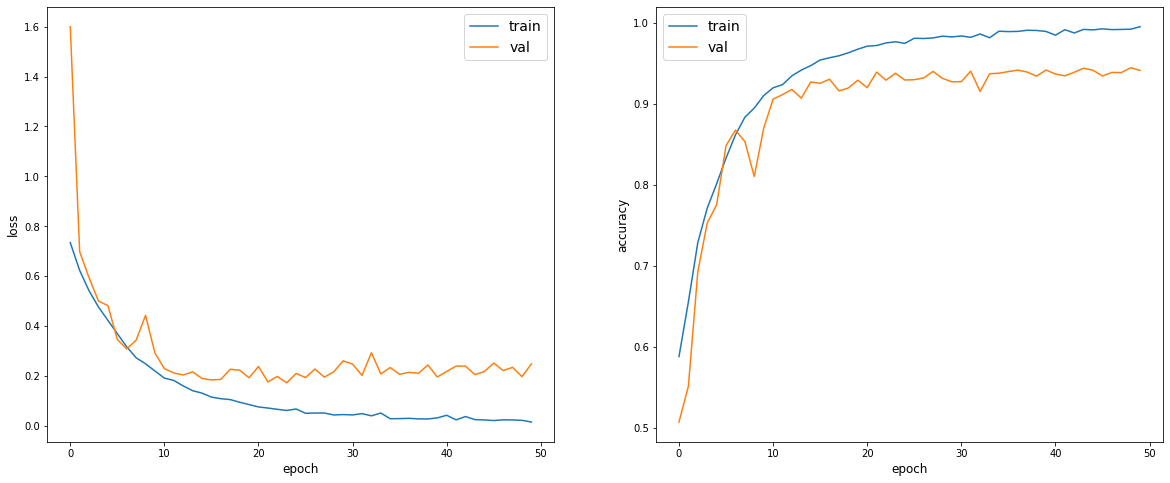

157/157 [==============================] - 2s 14ms/step - loss: 0.2488 - binary_accuracy: 0.9410
Test loss and acc for batch 128: [0.2487600282257458, 0.9409527622097679]
Epoch 1/50
79/79 [==============================] - 30s 296ms/step - loss: 0.7559 - binary_accuracy: 0.5771 - val_loss: 0.8632 - val_binary_accuracy: 0.5114
Epoch 2/50
79/79 [==============================] - 23s 288ms/step - loss: 0.6158 - binary_accuracy: 0.6691 - val_loss: 0.7989 - val_binary_accuracy: 0.5070
Epoch 3/50
79/79 [==============================] - 23s 288ms/step - loss: 0.5412 - binary_accuracy: 0.7303 - val_loss: 1.1025 - val_binary_accuracy: 0.5070
Epoch 4/50
79/79 [==============================] - 23s 288ms/step - loss: 0.4764 - binary_accuracy: 0.7723 - val_loss: 1.3033 - val_binary_accuracy: 0.5076
Epoch 5/50
79/79 [==============================] - 23s 288ms/step - loss: 0.4269 - binary_accuracy: 0.8063 - val_loss: 1.2587 - val_binary_accuracy: 0.5086
Epoch 6/50
79/79 [==========================

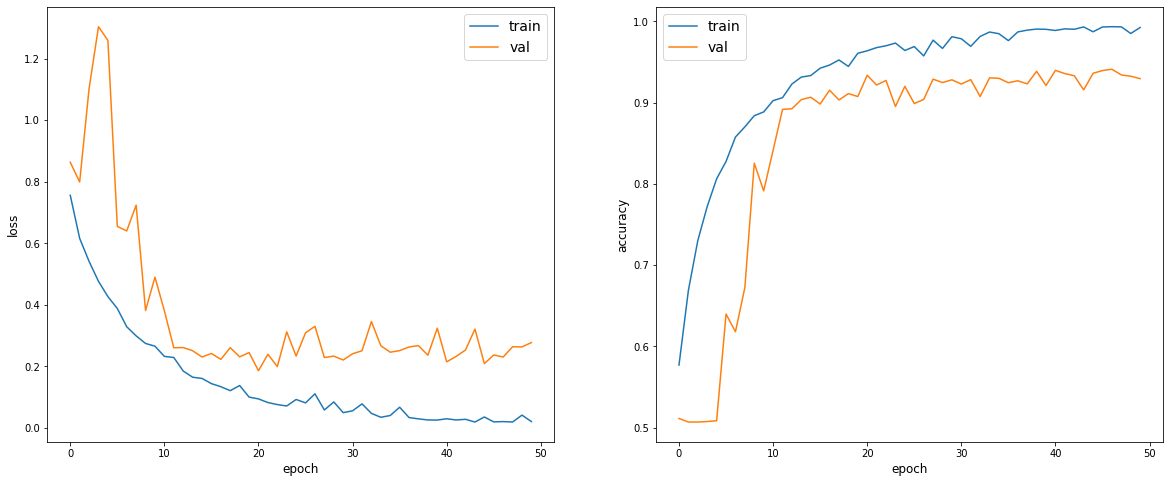

157/157 [==============================] - 2s 14ms/step - loss: 0.2776 - binary_accuracy: 0.9295
Test loss and acc for batch 256: [0.2776064267622518, 0.9295436349079264]


In [ ]:
# Training model 3, the best, with different batch sizes

batches = [32, 128, 256]

for batch in batches:
  model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

# compiling the model
  model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

  history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_data = (X_test, y_test))

  performance_plot(history)

  result_op1 = model3.evaluate(X_test, y_test)
  print(f"Test loss and acc for batch {batch}:", result_op1)

Epoch 1/50
313/313 [==============================] - 30s 84ms/step - loss: 0.7955 - binary_accuracy: 0.5611 - val_loss: 0.6699 - val_binary_accuracy: 0.5931
Epoch 2/50
313/313 [==============================] - 26s 83ms/step - loss: 0.7213 - binary_accuracy: 0.6055 - val_loss: 0.6740 - val_binary_accuracy: 0.5713
Epoch 3/50
313/313 [==============================] - 26s 83ms/step - loss: 0.6890 - binary_accuracy: 0.6310 - val_loss: 0.7868 - val_binary_accuracy: 0.5669
Epoch 4/50
313/313 [==============================] - 26s 83ms/step - loss: 0.6440 - binary_accuracy: 0.6659 - val_loss: 0.7599 - val_binary_accuracy: 0.6863
Epoch 5/50
313/313 [==============================] - 26s 83ms/step - loss: 0.5830 - binary_accuracy: 0.7063 - val_loss: 0.7416 - val_binary_accuracy: 0.6419
Epoch 6/50
313/313 [==============================] - 26s 83ms/step - loss: 0.5467 - binary_accuracy: 0.7290 - val_loss: 0.6931 - val_binary_accuracy: 0.6717
Epoch 7/50
313/313 [==============================] 

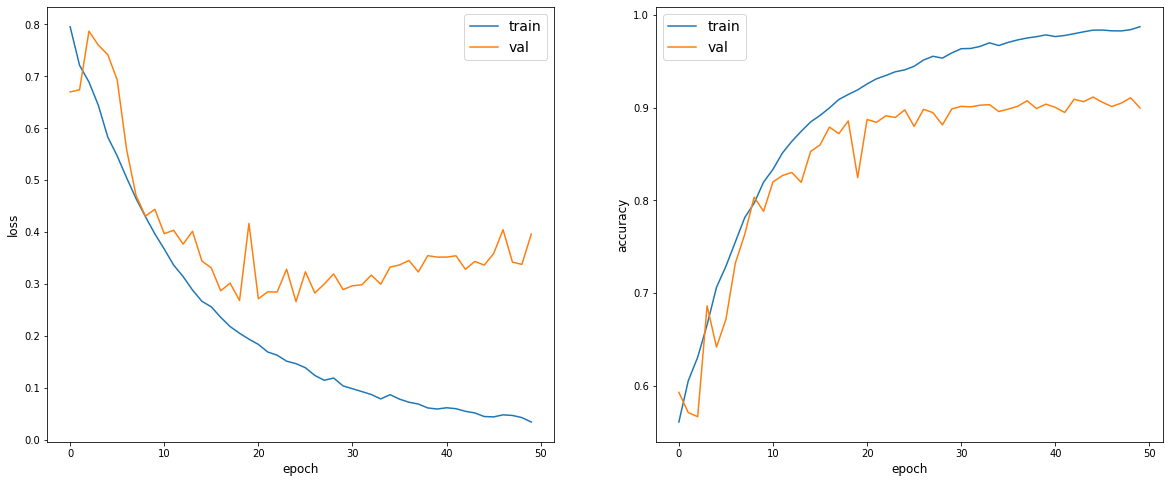

157/157 [==============================] - 2s 13ms/step - loss: 0.3963 - binary_accuracy: 0.8995
test loss, test acc: [0.3963031817295255, 0.899519615692554]


In [ ]:
# Now training model 3 with best batch size 32 with different optimizers

# TRAINING MODEL 3 with SGD

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compiling the model
model3.compile(optimizer = op_2, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = 32, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result_op2 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_op2)

Epoch 1/50
313/313 [==============================] - 32s 86ms/step - loss: 0.9179 - binary_accuracy: 0.5301 - val_loss: 0.9064 - val_binary_accuracy: 0.5042
Epoch 2/50
313/313 [==============================] - 27s 85ms/step - loss: 0.8283 - binary_accuracy: 0.5647 - val_loss: 0.9897 - val_binary_accuracy: 0.5260
Epoch 3/50
313/313 [==============================] - 27s 85ms/step - loss: 0.7915 - binary_accuracy: 0.5799 - val_loss: 0.7081 - val_binary_accuracy: 0.6203
Epoch 4/50
313/313 [==============================] - 27s 85ms/step - loss: 0.7327 - binary_accuracy: 0.6133 - val_loss: 0.7253 - val_binary_accuracy: 0.6169
Epoch 5/50
313/313 [==============================] - 27s 85ms/step - loss: 0.6721 - binary_accuracy: 0.6578 - val_loss: 0.7441 - val_binary_accuracy: 0.5963
Epoch 6/50
313/313 [==============================] - 27s 85ms/step - loss: 0.6050 - binary_accuracy: 0.7003 - val_loss: 0.8221 - val_binary_accuracy: 0.5731
Epoch 7/50
313/313 [==============================] 

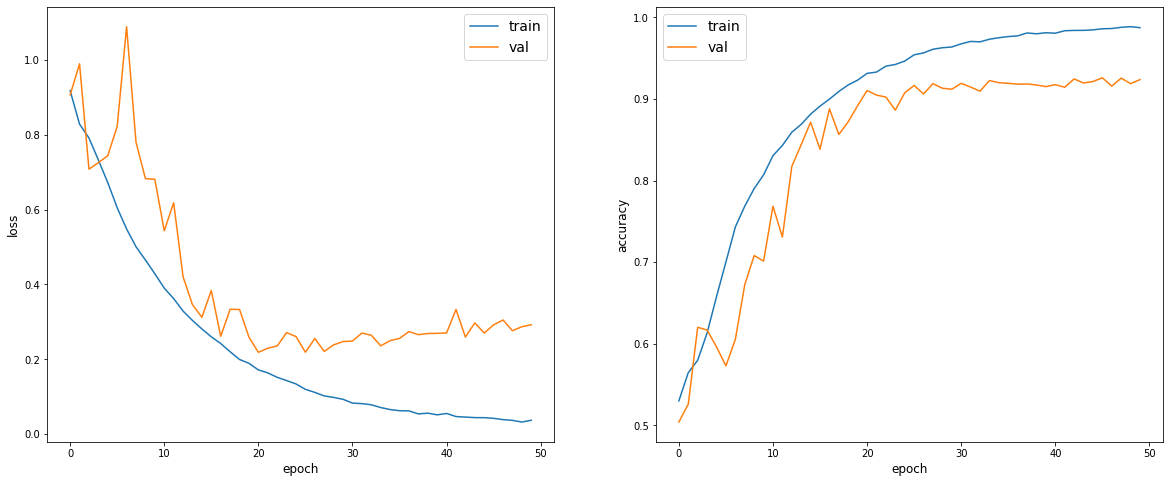

157/157 [==============================] - 2s 13ms/step - loss: 0.2925 - binary_accuracy: 0.9237
test loss, test acc: [0.292479331298018, 0.9237389911929543]


In [ ]:
# TRAINING MODEL 3 with RMSprop

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compiling the model
model3.compile(optimizer = op_3, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = 32, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result_op3 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_op3)

In [8]:
# Adam is still the best optimizer, so we run 5-Fold CV with it

# 5-FOLD CV

acc_model3 = []
loss_model3 = []

# Best model for CV

# Defining 5-fold cross validation
splits = 5
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# compiling the model

fold_n = 1
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

    model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

    history = model3.fit(X_train, y_train, epochs = epoch, batch_size = 32, verbose = 0)

    y_pred = model3.predict(X_test)
    y_pred_np = tf.round(y_pred).numpy()
    # computing zero-one loss
    y_test_np = y_test.numpy()

    # CREATING THE ZERO ONE LOSS

    acc_model3.append(accuracy_score(y_test_np, y_pred_np))
    loss_model3.append(zero_one_loss(y_test_np, y_pred_np))

# printing the current fold metrics
    print(f'Score for fold {fold_n}: Loss of {zero_one_loss(y_test_np, y_pred_np)}; Acc. of {accuracy_score(y_test_np, y_pred_np)}')

    fold_n = fold_n + 1
# Provide average scores
print('Score per fold')
for i in range(0, len(loss_model3)):
    print(f'> Fold {i + 1} - Loss: {loss_model3[i]} - Accuracy: {acc_model3[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_model3)} (+- {np.std(acc_model3)})')
print(f'> Zero-one Loss: {np.mean(loss_model3)}')

157/157 [==============================] - 2s 12ms/step
Score for fold 1: Loss of 0.06645316253002398; Acc. of 0.933546837469976
157/157 [==============================] - 2s 12ms/step
Score for fold 2: Loss of 0.0658526821457166; Acc. of 0.9341473178542834
157/157 [==============================] - 2s 12ms/step
Score for fold 3: Loss of 0.06505204163330669; Acc. of 0.9349479583666933
157/157 [==============================] - 2s 12ms/step
Score for fold 4: Loss of 0.059259259259259234; Acc. of 0.9407407407407408
157/157 [==============================] - 2s 12ms/step
Score for fold 5: Loss of 0.05945945945945941; Acc. of 0.9405405405405406
Score per fold
> Fold 1 - Loss: 0.06645316253002398 - Accuracy: 0.933546837469976%
> Fold 2 - Loss: 0.0658526821457166 - Accuracy: 0.9341473178542834%
> Fold 3 - Loss: 0.06505204163330669 - Accuracy: 0.9349479583666933%
> Fold 4 - Loss: 0.059259259259259234 - Accuracy: 0.9407407407407408%
> Fold 5 - Loss: 0.05945945945945941 - Accuracy: 0.9405405405